### Title: Development of Python software to address a supervised learning challenge
### By: OJONUGWA WADA

# Importing Required Libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from sklearn.model_selection import KFold, cross_val_score
import plotly.subplots as sp

In [56]:
#Step 1: Import the data
file_path = "cw1data.csv"
df = pd.read_csv(file_path)

df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,49.83,1.68,82.8,24,6.554,6.538,6.438,6.390,6.318,29.44,39.83,59.10,54.11,40.72
1,50.12,1.71,86.5,53,6.593,6.578,6.465,6.420,6.356,19.11,40.19,57.34,53.60,39.24
2,49.02,1.65,91.0,45,6.488,6.466,6.360,6.313,6.251,31.00,41.56,56.69,50.99,38.08
3,61.70,1.69,100.7,42,6.361,6.334,6.209,6.160,6.087,33.39,44.33,52.26,45.33,29.23
4,40.83,1.72,62.3,37,6.667,6.644,6.539,6.491,6.417,34.33,48.35,69.03,62.02,44.97


From the result of the code in cell 3 it was observed that the dataset has 135 rows and 14 columns. Each column contains 135 non-null values, meaning there are no missing values. Most columns (13 out of 14) are of type float64.

In [59]:
# Step 2: Display basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       135 non-null    float64
 1   x1      135 non-null    float64
 2   x2      135 non-null    float64
 3   x3      135 non-null    int64  
 4   x4      135 non-null    float64
 5   x5      135 non-null    float64
 6   x6      135 non-null    float64
 7   x7      135 non-null    float64
 8   x8      135 non-null    float64
 9   x9      135 non-null    float64
 10  x10     135 non-null    float64
 11  x11     135 non-null    float64
 12  x12     135 non-null    float64
 13  x13     135 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 14.9 KB


In [61]:
# Visualize the data
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
df.describe()


Missing Values:
 y      0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
dtype: int64


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,55.147333,1.621556,97.740000,44.859259,6.308985,6.284193,6.176126,6.125274,6.051637,25.716370,35.791407,49.388667,44.078370,30.672593
std,8.184919,0.064875,17.580812,13.231669,0.140394,0.140646,0.141849,0.141934,0.142768,5.216336,6.893616,8.379095,7.214192,5.766506
min,36.590000,1.450000,56.200000,18.000000,5.944000,5.922000,5.831000,5.790000,5.725000,9.930000,18.840000,29.810000,26.140000,17.100000
25%,49.640000,1.580000,86.500000,36.500000,6.215500,6.190000,6.087000,6.038000,5.963000,22.100000,30.805000,43.950000,38.955000,26.420000
50%,55.150000,1.630000,96.100000,46.000000,6.302000,6.276000,6.166000,6.118000,6.042000,25.810000,35.850000,50.170000,44.560000,30.600000
75%,61.845000,1.660000,111.350000,55.000000,6.405500,6.382000,6.260500,6.211500,6.141000,29.430000,40.865000,54.920000,48.910000,34.270000
max,74.950000,1.800000,136.800000,69.000000,6.684000,6.654000,6.539000,6.491000,6.417000,41.920000,59.690000,74.410000,62.020000,44.970000


 # Distribution Analysis 

This code provides a comprehensive view of the distribution of numerical features in the dataset, helping us uncover hidden patterns and characteristics that might influence future analysis or model performance

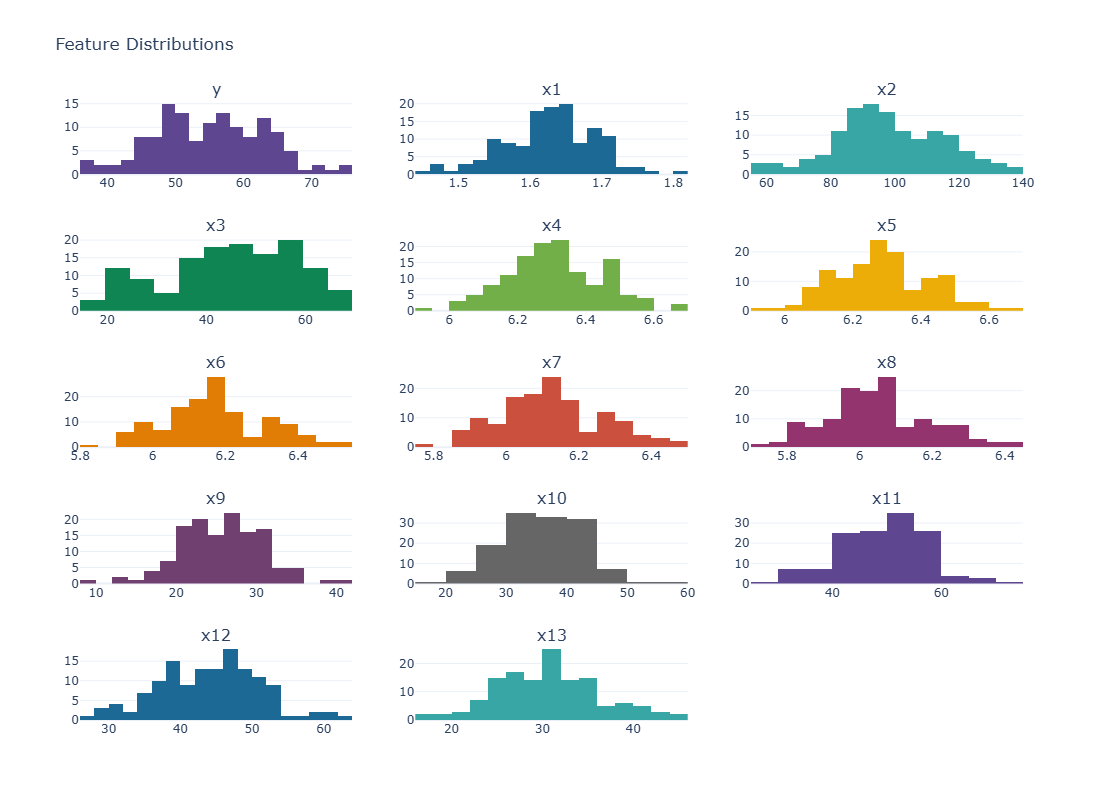

In [65]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Create subplots with 3 columns per row
from plotly.subplots import make_subplots

num_features = len(numeric_cols)
cols = 3  # Number of columns per row
rows = (num_features // cols) + (num_features % cols > 0)

fig = make_subplots(rows=rows, cols=cols, subplot_titles=numeric_cols)

# Add histograms for each feature
for i, feature in enumerate(numeric_cols):
    row = (i // cols) + 1
    col = (i % cols) + 1
    fig.add_trace(
        go.Histogram(x=df[feature], nbinsx=20, name=feature, 
                     marker=dict(color=px.colors.qualitative.Prism[i % len(px.colors.qualitative.Prism)])), 
        row=row, col=col
    )

# Update layout
fig.update_layout(
    title="Feature Distributions",
    height=800, width=1200, 
    showlegend=False,
    template="plotly_white"
)

# Show the plot
fig.show()

The histogram grid shows the distribution of multiple features, highlighting their spread, central tendencies, and variability. Some features, like `x5` and `x6`, follow a normal distribution, while others, such as `x1` and `x2`, are skewed. Features like `y`, `x3`, and `x12` have multiple peaks, indicating variability. Understanding these distributions helps in detecting skewness, outliers, and feature importance for modeling.

# Feature Correlations

This code is essential for understanding how features in the dataset relate to one another by visualizing their correlation matrix as a heatmap.

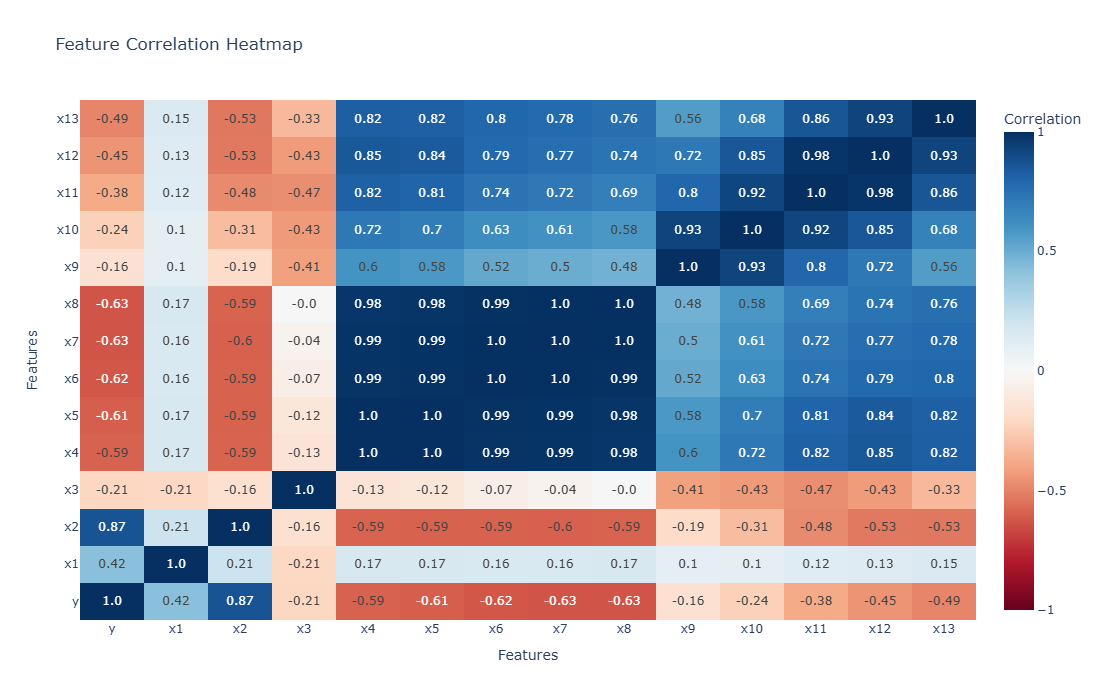

In [70]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create an interactive correlation heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='RdBu',  
    colorbar=dict(title="Correlation"),
    zmin=-1, zmax=1,
    text=corr_matrix.round(2).astype(str).values,  
    texttemplate="%{text}",  
    hoverinfo="z+text"
))

fig_heatmap.update_layout(
    title="Feature Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    width=900,
    height=700
)

fig_heatmap.show()

This Feature Correlation Heatmap reveals important relationships between variables in the dataset. Strongly correlated features, such as x4, x5, x6, x7, and x8, suggest redundancy, which could lead to multicollinearity issues. The negative correlations between x3, x4, x5, x6, x7, and x8 with y indicate that as these features increase, y tends to decrease, highlighting an inverse relationship. On the other hand, x1 and x2 show a positive correlation with y, with x2 having the strongest influence, making it a key feature for prediction. Meanwhile, features like x10, x11, x12, and x13 exhibit weaker correlations, suggesting they may have a more independent role in the dataset. These insights are essential for feature selection, model optimization, and avoiding redundant information in machine learning applications.

# Data Splitting

In this code, The dataset (df) has various features (independent variables) and one target variable (y), which is what we want to predict. First, we separate y from the rest of the dataset. Then, we divide the data into two parts: 80% for training the machine learning model and 20% for testing how well the model has learned. The random_state=42 ensures the split is always the same if we run the code multiple times.

In [75]:
# Step 3: Split Data into Training & Testing Sets
X = df.drop(columns=['y'])
y = df['y']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

Training set shape: (108, 13)
Testing set shape: (27, 13)


# Regression Model

In this code, we are building and evaluating two regression models to predict a target variable. First, we train a Linear Regression model, which tries to find the best straight-line relationship between the input features (X_train) and the target variable (y_train). After training, we use this model to make predictions on the test data (X_test).

Next, we train a Random Forest Regressor, which consists of multiple decision trees working together to improve prediction accuracy. Each tree makes its own prediction, and the final result is the average of all trees. The n_estimators=100 means the model uses 100 trees, and random_state=42 ensures consistent results if we run the code multiple times. Finally, we use this trained model to predict values for X_test.

In [79]:
# Step 4: Build and evaluate regression models
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [81]:
# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Model Evaluation

In this code, we define a function to evaluate how well the models perform. The function calculates four metrics: **Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score**, which help measure the accuracy of predictions.  

We then evaluate the **Linear Regression** and **Random Forest Regressor** models by comparing their predictions to the actual values in `y_test`. The results are stored in a list and converted into a DataFrame for easy viewing.  

Finally, we create an interactive **Plotly table** to display the evaluation results in a visually appealing format. The table has a **blue header** and a **lavender-colored body**, making it easy to interpret.

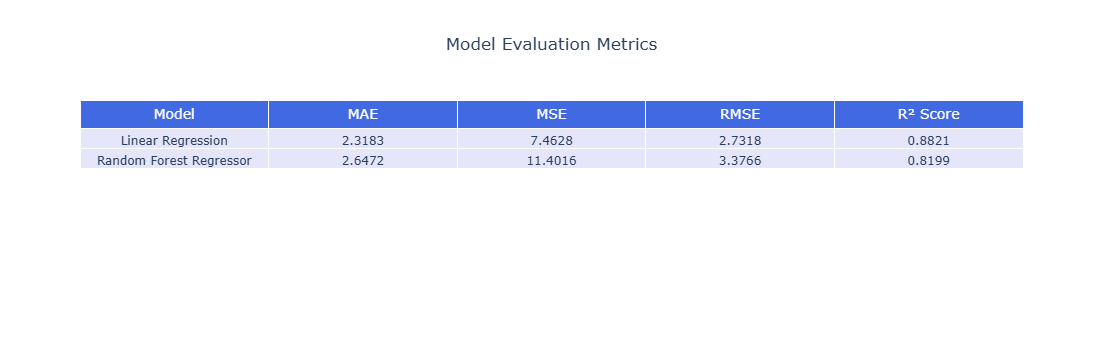

In [85]:
# Function to evaluate models and store results
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_true, y_pred)

    return [model_name, f"{mae:.4f}", f"{mse:.4f}", f"{rmse:.4f}", f"{r2:.4f}"]

# Store evaluation results in a list
evaluation_results = []
evaluation_results.append(evaluate_model(y_test, lr_preds, "Linear Regression"))
evaluation_results.append(evaluate_model(y_test, rf_preds, "Random Forest Regressor"))

# Convert to DataFrame
columns = ["Model", "MAE", "MSE", "RMSE", "R² Score"]
df_results = pd.DataFrame(evaluation_results, columns=columns)

# Create an interactive Plotly table
fig = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=columns,
                fill_color="royalblue",
                font=dict(color="white", size=14),
                align="center",
            ),
            cells=dict(
                values=[df_results[col] for col in df_results.columns],
                fill_color="lavender",
                align="center",
            ),
        )
    ]
)

# Update layout
fig.update_layout(title_text="Model Evaluation Metrics", title_x=0.5)

# Show table
fig.show()

Linear Regression performs better than the Random Forest Regressor, as it has a lower Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), indicating smaller prediction errors. It also has a higher R² score (0.8821 vs. 0.8199), meaning it explains more variance in the target variable. This suggests that for this dataset, Linear Regression provides more accurate and reliable predictions than Random Forest.

# Optional Features

In this code, we perform **cross-validation** to evaluate how well the models generalize to unseen data. We use **K-Fold Cross-Validation** with 5 splits, meaning the dataset is divided into 5 equal parts, and each model is trained and tested 5 times on different subsets.  

For both **Linear Regression** and **Random Forest Regressor**, we calculate the **R² score** for each fold and compute the average score to get a more reliable performance estimate.  

The results are stored in a DataFrame and displayed using an interactive **Plotly table**. Each fold’s score is shown, and the **mean R² score** is highlighted in gold for better visibility. The table has a **blue header** and a **light gray background** for the folds, ensuring a clean and professional look.

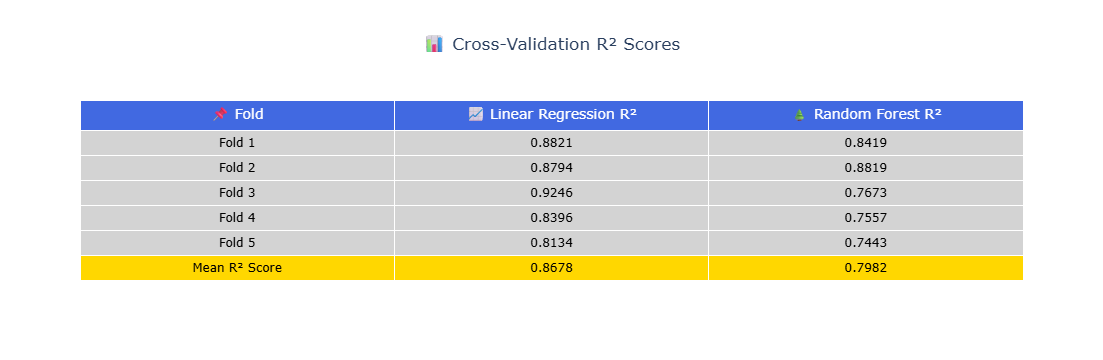

In [90]:
# Step 5: Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Linear Regression Cross-Validation
lr_cv_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='r2')
lr_mean_score = np.mean(lr_cv_scores)

# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')
rf_mean_score = np.mean(rf_cv_scores)

# Prepare Data for Table
cv_results_df = pd.DataFrame({
    "Fold": [f"Fold {i+1}" for i in range(5)] + ["Mean R² Score"],
    "Linear Regression": [f"{score:.4f}" for score in lr_cv_scores] + [f"{lr_mean_score:.4f}"],
    "Random Forest": [f"{score:.4f}" for score in rf_cv_scores] + [f"{rf_mean_score:.4f}"]
})

# Create Plotly Table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["📌 Fold", "📈 Linear Regression R²", "🌲 Random Forest R²"],
        fill_color="royalblue",
        align="center",
        font=dict(color="white", size=14),
        height=30
    ),
    cells=dict(
        values=[cv_results_df["Fold"], cv_results_df["Linear Regression"], cv_results_df["Random Forest"]],
        fill_color=[["lightgray"]*5 + ["gold"]],  # Highlights mean score
        align="center",
        font=dict(color="black", size=12),
        height=25
    )
)])

# Update Layout
fig.update_layout(
    title="📊 Cross-Validation R² Scores",
    title_x=0.5,
    template="plotly_white"
)

# Show interactive table
fig.show()


Linear Regression consistently outperforms Random Forest in cross-validation, achieving a higher mean R² score (0.8678 vs. 0.7982), indicating better overall predictive performance. Across all folds, Linear Regression maintains higher R² values, showing more stability and reliability in capturing variance in the data compared to Random Forest.

In this code, we visualize how well the models' predictions align with the actual values. We create a subplot with **two scatter plots**, one for **Linear Regression** and one for **Random Forest Regressor**.  

For both models, we plot the actual values (`y_test`) on the x-axis and the predicted values on the y-axis. Each model's predictions are represented as **scatter points**—blue for **Linear Regression** and green for **Random Forest**.  

To help assess prediction accuracy, we include a **red dashed line**, which represents a **perfect prediction** (where actual and predicted values are equal). The closer the points are to this line, the better the model's predictions.  

Finally, we adjust the figure layout for clarity, set the width to **1000 pixels**, and remove the legend to keep the visualization clean.

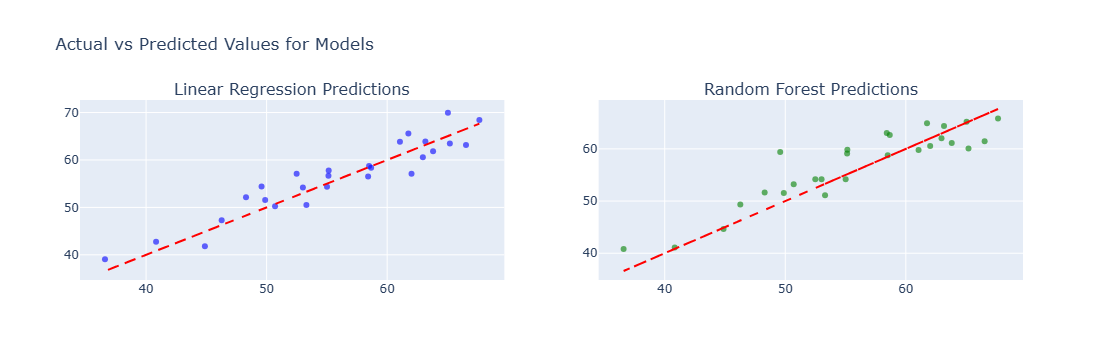

In [94]:
# Step 6: Prediction Visualization
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=["Linear Regression Predictions", "Random Forest Predictions"])

# Scatter plot: Linear Regression
fig.add_trace(go.Scatter(x=y_test, y=lr_preds, mode='markers', marker=dict(color='blue', opacity=0.6), name="LR"),
              row=1, col=1)
fig.add_trace(go.Scatter(x=y_test, y=y_test, mode="lines", line=dict(color="red", dash="dash"), name="Perfect Prediction"),
              row=1, col=1)

# Scatter plot: Random Forest
fig.add_trace(go.Scatter(x=y_test, y=rf_preds, mode='markers', marker=dict(color='green', opacity=0.6), name="RF"),
              row=1, col=2)
fig.add_trace(go.Scatter(x=y_test, y=y_test, mode="lines", line=dict(color="red", dash="dash"), name="Perfect Prediction"),
              row=1, col=2)

fig.update_layout(title="Actual vs Predicted Values for Models", width=1000, showlegend=False)
fig.show()

This visualization compares actual vs. predicted values for Linear Regression and Random Forest models. The red dashed line represents the ideal predictions (where actual equals predicted).

- **Linear Regression Predictions**: The points closely follow the red dashed line, indicating that the model makes relatively accurate predictions with some variance.
- **Random Forest Predictions**: Predictions are more scattered around the red line, showing some deviation, especially in the middle range.

Overall, Linear Regression appears to be more consistent, aligning with the evaluation metrics where it had a higher R² score. Would you like help generating similar plots in your notebook?

In this code, the feature important scoeres was extracted from the trained Random Forest model and store them in a DataFrame. To enhance readability, we sort the features in ascending order based on their importance.

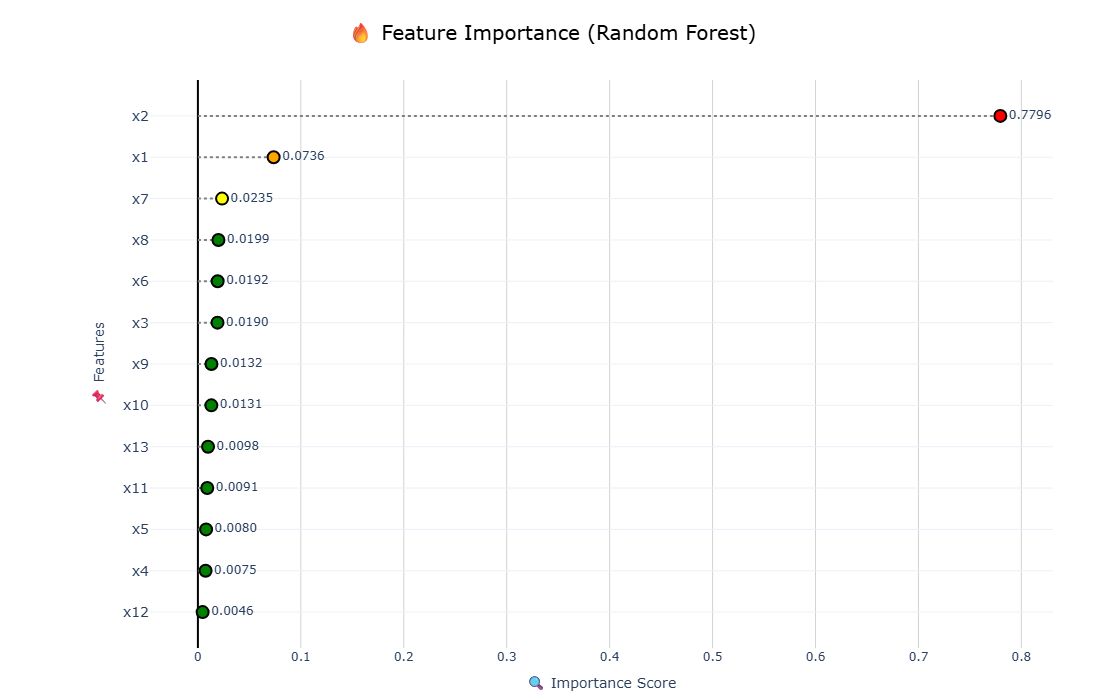

In [98]:
# Compute Feature Importance
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort by importance for better visualization
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=True)

# Define a **color scale based on importance values**
color_scale = np.where(feature_importance_df["Importance"] > 0.1, "red",  # High Importance → Red
                       np.where(feature_importance_df["Importance"] > 0.05, "orange",  # Medium → Orange
                                np.where(feature_importance_df["Importance"] > 0.02, "yellow",  # Low-Medium → Yellow
                                         "green")))  # Lowest → Green

# Create Lollipop Chart
fig = go.Figure()

# Add **individual thin stems** from baseline (0) to each importance value
for i in range(len(feature_importance_df)):
    fig.add_trace(go.Scatter(
        x=[0, feature_importance_df["Importance"].iloc[i]],  # Line from 0 to importance value
        y=[feature_importance_df["Feature"].iloc[i]] * 2,  # Keeps the line horizontal
        mode="lines",
        line=dict(color="gray", width=2, dash="dot"),  # Dashed gray line for clarity
        showlegend=False  # Hides extra traces from appearing in legend
    ))

# Add **colorful circles at the tip** of each line
fig.add_trace(go.Scatter(
    x=feature_importance_df["Importance"],
    y=feature_importance_df["Feature"],
    mode="markers+text",
    marker=dict(
        size=12, 
        color=color_scale,  # **Dynamic Colors**
        line=dict(width=2, color="black")  # Black border for contrast
    ),
    text=[f"{imp:.4f}" for imp in feature_importance_df["Importance"]],
    textposition="middle right",
    showlegend=False  # **Removes the green dot in the legend**
))

# Update layout for **better readability**
fig.update_layout(
    title=dict(text="🔥 Feature Importance (Random Forest)", x=0.5, font=dict(size=20, color="black")), 
    xaxis_title="🔍 Importance Score", 
    yaxis_title="📌 Features",
    xaxis=dict(tickfont=dict(size=12), zeroline=True, zerolinecolor="black", gridcolor="lightgray"),  
    yaxis=dict(tickfont=dict(size=14)),  
    height=700,
    width=950,
    template="plotly_white",
    margin=dict(l=150, r=50, t=80, b=50),  
)

# Show interactive plot
fig.show()


This feature importance plot for the Random Forest model highlights the significance of each feature in predicting the target variable. Feature x2 is the most influential, with an importance score of 0.7796, followed by x1 at 0.0736, while other features contribute minimally. The visualization effectively shows the dominant role of x2 in the model's decision-making process. Let me know if you need any refinements!

In this code, the feature important scoeres was extracted from the trained Linear Regression model and store them in a DataFrame. To enhance readability, we sort the features in ascending order based on their importance.

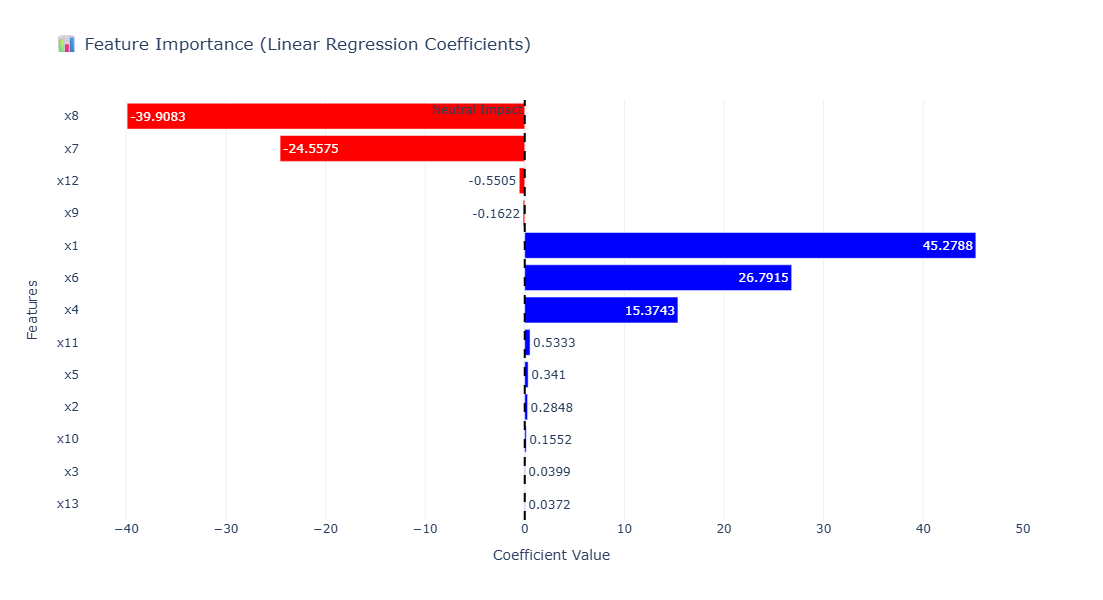

In [102]:
# Compute feature importance
lr_coefficients = lr_model.coef_
lr_importance_df = pd.DataFrame({"Feature": X.columns, "Coefficient": lr_coefficients})

# Sorting by absolute coefficient value
lr_importance_df["Abs_Coefficient"] = lr_importance_df["Coefficient"].abs()
lr_importance_df = lr_importance_df.sort_values(by="Abs_Coefficient", ascending=True)  # Sorted for better visualization

# Define color mapping (Positive = Blue, Negative = Red)
lr_importance_df["Impact"] = ["Positive" if coef > 0 else "Negative" for coef in lr_importance_df["Coefficient"]]

# Create an interactive bar chart
fig = px.bar(
    lr_importance_df,
    x="Coefficient",
    y="Feature",
    orientation="h",
    color="Impact",
    color_discrete_map={"Positive": "blue", "Negative": "red"},
    title="📊 Feature Importance (Linear Regression Coefficients)",
    text=lr_importance_df["Coefficient"].round(4),  # Show values
)

# Add reference line at 0
fig.add_vline(x=0, line=dict(color="black", dash="dash"), annotation_text="Neutral Impact", annotation_position="top left")

# Update layout for better visibility
fig.update_layout(
    template="plotly_white",
    height=600,
    width=900,
    showlegend=False,
    xaxis_title="Coefficient Value",
    yaxis_title="Features",
)

# Show interactive plot
fig.show()

This feature importance plot for Linear Regression displays the coefficient values of each feature, showing their impact on the target variable. Feature `x1` has the highest positive influence at `45.2788`, followed by `x6` at `26.7915`, while `x8` and `x7` have strong negative effects at `-39.9083` and `-24.5575`, respectively. The chart effectively highlights the most influential features in the model's predictions. Let me know if you need any adjustments!